In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('./fer2013.csv')

In [3]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
df_training = df[df.Usage == 'Training']
df_public_testing = df[df.Usage == 'PublicTest']
df_private_testing = df[df.Usage == 'PrivateTest']

In [5]:
X = []

for i in range(len(df)):
    l = df.pixels[i]
    ls = l.split()

    for i in range(len(ls)):
        ls[i] = float(ls[i])
    x = np.reshape(ls, (48, 48))
    X.append(x)

In [6]:
X = np.asarray(X)

In [7]:
X.shape

(35887, 48, 48)

In [8]:
Xtrain = X[ : df_training.shape[0]]
Xpublic_test = X[df_training.shape[0]:df_training.shape[0] + df_public_testing.shape[0]]
Xprivate_test = X[df_training.shape[0] + df_public_testing.shape[0]: ]

In [9]:
Y = df.emotion.values

In [10]:
Ytrain = Y[ : df_training.shape[0]] 
Ypublic_test = Y[df_training.shape[0]:df_training.shape[0] + df_public_testing.shape[0]] 
Yprivate_test = Y[df_training.shape[0] + df_public_testing.shape[0]: ]

In [11]:
Ytrain = Ytrain.astype(int)
Ypublic_test = Ypublic_test.astype(int)
Yprivate_test = Yprivate_test.astype(int)

In [12]:
print(len(Xpublic_test), len(Ypublic_test))

3589 3589


In [13]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [14]:
def emotion_indicator(number):
    return label_map[number]

In [15]:
len(Xtrain)

28709

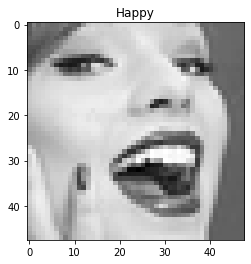

In [16]:
k = random.randint(0, len(Xtrain))

plt.imshow(Xtrain[k], cmap = 'gray')
plt.title(emotion_indicator(Ytrain[k]))
plt.show()

In [21]:
Xtrain[k].shape

(48, 48)

In [17]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam

In [18]:
def create_model():

    i = Input(shape=(48,48,1))
    x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(i)
    x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = Conv2D(256, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(7, activation='softmax')(x)
    model = Model(inputs=i, outputs=x)

    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
train = model.fit(Xtrain, Ytrain, epochs=30, batch_size = 256, verbose = 1, validation_data = (Xpublic_test, Ypublic_test))

Epoch 1/30
113/113 [==============================] - 1441s 13s/step - loss: 1.9231 - accuracy: 0.2179 - val_loss: 1.8323 - val_accuracy: 0.2527
Epoch 2/30
113/113 [==============================] - 1460s 13s/step - loss: 1.7843 - accuracy: 0.2601 - val_loss: 1.8293 - val_accuracy: 0.2524
Epoch 3/30
113/113 [==============================] - 1466s 13s/step - loss: 1.6671 - accuracy: 0.3298 - val_loss: 1.6270 - val_accuracy: 0.3736
Epoch 4/30
113/113 [==============================] - 1460s 13s/step - loss: 1.5506 - accuracy: 0.3851 - val_loss: 1.6262 - val_accuracy: 0.3828
Epoch 5/30
113/113 [==============================] - 1455s 13s/step - loss: 1.4453 - accuracy: 0.4367 - val_loss: 1.6086 - val_accuracy: 0.3720
Epoch 6/30
113/113 [==============================] - 1459s 13s/step - loss: 1.3831 - accuracy: 0.4649 - val_loss: 1.4892 - val_accuracy: 0.4324
Epoch 7/30
113/113 [==============================] - 1460s 13s/step - loss: 1.3307 - accuracy: 0.4914 - val_loss: 1.2971 - val_ac

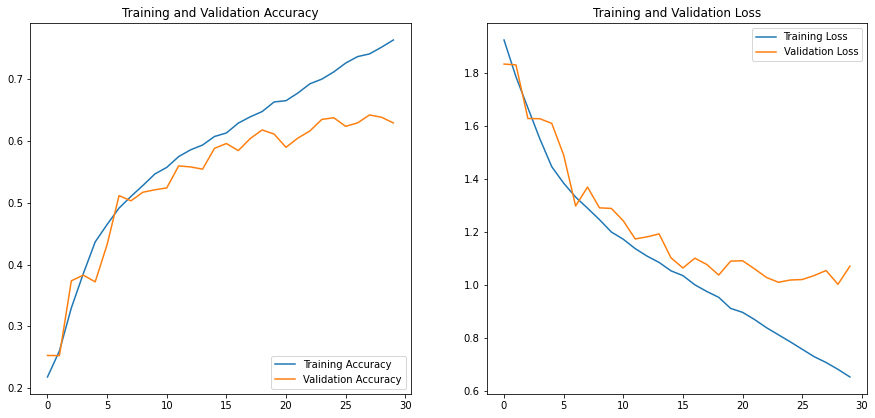

In [23]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
test_prob = model.predict(Xprivate_test)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == Yprivate_test)
print(test_accuracy)

0.6458623572025634


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf_mat = confusion_matrix(Yprivate_test, test_pred)

In [31]:
pd.DataFrame(conf_mat, columns=label_map, index=label_map)

,Anger,Disgust,Fear,Happy,Sad,Surprise,Neutral
Anger,246,4,31,23,100,3,84
Disgust,10,31,3,4,6,0,1
Fear,42,3,199,30,143,30,81
Happy,9,0,20,766,39,8,37
Sad,30,0,22,38,361,3,140
Surprise,5,0,70,31,12,275,23
Neutral,12,0,12,49,108,5,440


In [34]:
from mlxtend.plotting import plot_confusion_matrix

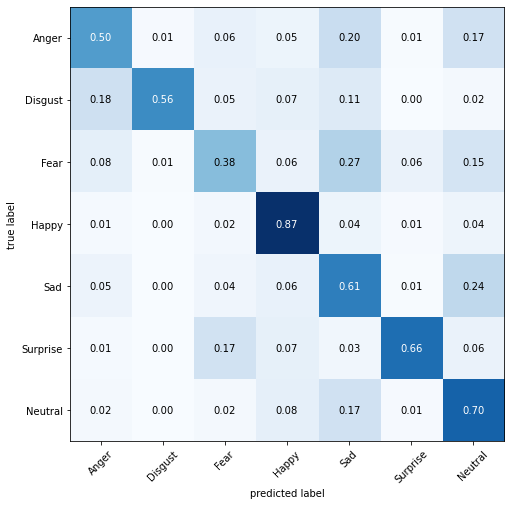

In [37]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=label_map,
                                figsize=(8, 8))

In [25]:
Xtrain[k].shape

(48, 48)

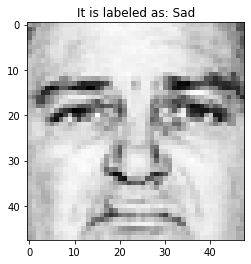

And we predict
Anger: 4.08 %
Disgust: 0.25 %
Fear: 5.11 %
Happy: 29.75 %
Sad: 51.14 %
Surprise: 0.12 %
Neutral: 9.55 %


In [22]:
k = random.randint(0, len(Xprivate_test))

plt.imshow(Xtrain[k], cmap = 'gray')
plt.title("It is labeled as: " + emotion_indicator(Yprivate_test[k]))
plt.show()
    
z = [Xprivate_test[k]]
z = np.asarray(z)
test_prob = model.predict(z)


print("And we predict")
for j in range(len(label_map)):
    print(label_map[j] + ": %4.2f %%" % (test_prob[0][j]*100))


In [100]:
model.save_weights('emotion_weights')

In [102]:
model = create_model()
test_prob = model.predict(Xprivate_test)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == Yprivate_test)
print(test_accuracy)

0.1733073279465032


In [20]:
model.load_weights('emotion_weights')
test_prob = model.predict(Xprivate_test)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == Yprivate_test)
print(test_accuracy)

0.6458623572025634
